In [150]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from  sklearn.model_selection import train_test_split
import sklearn.metrics as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import learning_curve

In [151]:
data=pd.read_csv('FuelConsumptionCo2.csv')

In [152]:
data.head(5)

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [153]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [155]:
data.duplicated().value_counts()

False    952
True     115
dtype: int64

In [156]:
data.drop_duplicates(inplace=True)

In [157]:
data.isnull().sum()

MODELYEAR                   0
Brands                      0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [158]:
data.dropna(inplace=True)

In [159]:
data[data==np.inf].value_counts()

Series([], dtype: int64)

In [160]:
data[data==np.infty].sum()

MODELYEAR                   0.0
Brands                        0
VEHICLECLASS                  0
ENGINESIZE                  0.0
CYLINDERS                   0.0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: object

In [161]:
data[data==np.negative(np.inf)].sum()

MODELYEAR                   0.0
Brands                        0
VEHICLECLASS                  0
ENGINESIZE                  0.0
CYLINDERS                   0.0
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY        0.0
FUELCONSUMPTION_HWY         0.0
FUELCONSUMPTION_COMB        0.0
FUELCONSUMPTION_COMB_MPG    0.0
CO2EMISSIONS                0.0
dtype: object

One Hot Encoding

In [162]:
data['Brands']=data['Brands'].astype('category')
data['TRANSMISSION']=data['TRANSMISSION'].astype('category')
data['VEHICLECLASS']=data['VEHICLECLASS'].astype('category')
data['FUELTYPE']=data['FUELTYPE'].astype('category')


In [163]:
data['new_Brand']=data['Brands'].cat.codes
data['new_Trans']=data['TRANSMISSION'].cat.codes
data['new_VEHICLECLASS']=data['VEHICLECLASS'].cat.codes
data['new_FUELTYPE']=data['FUELTYPE'].cat.codes

In [164]:
enc=preprocessing.OneHotEncoder()

In [165]:
enc_data=pd.DataFrame(enc.fit_transform(data[['new_Brand','new_Trans','new_VEHICLECLASS','new_FUELTYPE']]).toarray())
data=data.join(enc_data)
data.drop(['Brands','new_Brand','TRANSMISSION','new_Trans','new_VEHICLECLASS','new_FUELTYPE','VEHICLECLASS','FUELTYPE'],axis=1,inplace=True)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 1066
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 952 non-null    int64  
 1   ENGINESIZE                952 non-null    float64
 2   CYLINDERS                 952 non-null    int64  
 3   FUELCONSUMPTION_CITY      952 non-null    float64
 4   FUELCONSUMPTION_HWY       952 non-null    float64
 5   FUELCONSUMPTION_COMB      952 non-null    float64
 6   FUELCONSUMPTION_COMB_MPG  952 non-null    int64  
 7   CO2EMISSIONS              952 non-null    int64  
 8   0                         839 non-null    float64
 9   1                         839 non-null    float64
 10  2                         839 non-null    float64
 11  3                         839 non-null    float64
 12  4                         839 non-null    float64
 13  5                         839 non-null    float64
 14  6        

In [167]:
data.dropna(inplace=True)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 951
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 839 non-null    int64  
 1   ENGINESIZE                839 non-null    float64
 2   CYLINDERS                 839 non-null    int64  
 3   FUELCONSUMPTION_CITY      839 non-null    float64
 4   FUELCONSUMPTION_HWY       839 non-null    float64
 5   FUELCONSUMPTION_COMB      839 non-null    float64
 6   FUELCONSUMPTION_COMB_MPG  839 non-null    int64  
 7   CO2EMISSIONS              839 non-null    int64  
 8   0                         839 non-null    float64
 9   1                         839 non-null    float64
 10  2                         839 non-null    float64
 11  3                         839 non-null    float64
 12  4                         839 non-null    float64
 13  5                         839 non-null    float64
 14  6         

In [169]:
data.head(5)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,0,1,...,71,72,73,74,75,76,77,78,79,80
0,2014,2.0,4,9.9,6.7,8.5,33,196,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,2.4,4,11.2,7.7,9.6,29,221,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2014,1.5,4,6.0,5.8,5.9,48,136,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2014,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2014,3.5,6,12.1,8.7,10.6,27,244,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839 entries, 0 to 951
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 839 non-null    int64  
 1   ENGINESIZE                839 non-null    float64
 2   CYLINDERS                 839 non-null    int64  
 3   FUELCONSUMPTION_CITY      839 non-null    float64
 4   FUELCONSUMPTION_HWY       839 non-null    float64
 5   FUELCONSUMPTION_COMB      839 non-null    float64
 6   FUELCONSUMPTION_COMB_MPG  839 non-null    int64  
 7   CO2EMISSIONS              839 non-null    int64  
 8   0                         839 non-null    float64
 9   1                         839 non-null    float64
 10  2                         839 non-null    float64
 11  3                         839 non-null    float64
 12  4                         839 non-null    float64
 13  5                         839 non-null    float64
 14  6         

Data Split

In [211]:
x=data.drop(['CO2EMISSIONS'],axis=1)
y=data['CO2EMISSIONS']

Train Test Split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Linear Regression

In [213]:
linearReg=LinearRegression()

Prediction for fuel consumption in all cases

In [214]:
linearReg.fit(x_train,y_train)
pred=linearReg.predict(x_test)
print(sk.r2_score(y_test,pred))

0.8878655341402064


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Polynomial regression

In [227]:
polyreg=PolynomialFeatures(include_bias=False,degree=1)

In [228]:
poly_features=polyreg.fit_transform(x)

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [229]:
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.2,random_state=42)

In [237]:
linearReg.fit(x_train, y_train)
pred = linearReg.predict(x_test)
score = sk.r2_score(y_test, pred)
linear=score
linear

0.8878655341402064

Decision tree

In [238]:
treeReg=DecisionTreeRegressor(max_depth=5)

In [239]:
treeReg.fit(x_train,y_train)
treePred=treeReg.predict(x_test)

In [240]:
tree=sk.r2_score(y_test,treePred)
tree

0.9355132069222118

Grid search

In [241]:
parm_grid=[
    {
        'max_depth':[1,2,3,4,5,None],
        'splitter':['best','random'],
        'max_features':['auto','sqrt','log2']
    }
]

In [242]:
treg_cv=GridSearchCV(treeReg,parm_grid,cv=3)

In [243]:
treg_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(max_depth=5),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, None],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'splitter': ['best', 'random']}])

In [244]:
treg_cv.best_params_

{'max_depth': None, 'max_features': 'auto', 'splitter': 'best'}

In [247]:
treeReg = DecisionTreeRegressor(max_depth=None,max_features='auto',splitter='best')
treeReg.fit(x_train, y_train)
treePred = treeReg.predict(x_test)
Grid=sk.r2_score(y_test, treePred)
Grid

0.9338051696491996

Learning curve

In [253]:
train_sizes = [1, 100, 300, 500, 671]
train_sizes, train_scores, validation_scores = \
    learning_curve(estimator=LinearRegression(), X=x, y=y,
                                                              train_sizes=train_sizes, cv=5,
                                                              scoring='neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)  # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[  -0.           -0.           -0.           -0.           -0.        ]
 [-358.71814484 -926.79       -926.79       -926.79       -926.79      ]
 [-537.48865451 -377.61637469 -361.35467304 -361.35467304 -361.35467304]
 [-485.17458291 -334.67024186 -374.56520194 -463.91759932 -463.91759932]
 [-454.54472228 -324.21958035 -362.23676684 -433.32788596 -431.98317354]]

 ----------------------------------------------------------------------

Validation scores:

 [[-9.00602976e+03 -1.02829940e+04 -8.51524405e+03 -5.88438690e+03
  -7.36332335e+03]
 [-1.25608022e+03 -2.59123214e+03 -1.87643452e+03 -7.86625000e+02
  -8.13526946e+02]
 [-6.60634676e+02 -1.07034880e+03 -8.05636241e+02 -6.75201959e+02
  -6.01139497e+02]
 [-4.01273751e+02 -1.05305251e+03 -6.66160033e+02 -5.64880147e+02
  -4.87895984e+02]
 [-3.28787897e+02 -4.26142509e+22 -5.82396831e+22 -5.24741735e+02
  -4.88273386e+02]]


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [254]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100    813.175629
300    399.833810
500    424.449045
671    401.262426
dtype: float64

 --------------------

Mean validation scores

 1      8.210396e+03
100    1.464780e+03
300    7.625922e+02
500    6.346525e+02
671    2.017079e+22
dtype: float64


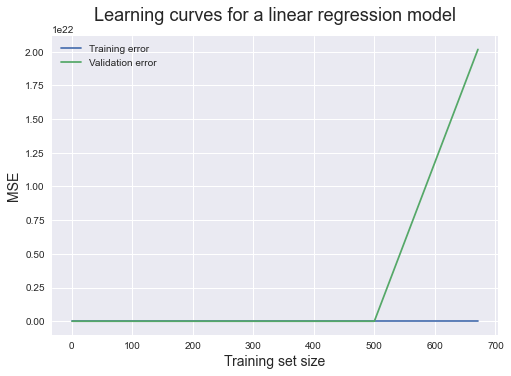

In [255]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

In [258]:
train_sizes = [1, 100, 300, 500, 671]
train_sizes, train_scores, validation_scores = \
    learning_curve(estimator=DecisionTreeRegressor(), X=x, y=y,
                                                             train_sizes=train_sizes, cv=5,
                                                             scoring='neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)  # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -9006.0297619  -10282.99404762  -8515.24404762  -5884.38690476
   -7363.32335329]
 [ -2089.2797619   -2939.41666667  -1838.30357143   -592.82142857
    -456.49700599]
 [  -954.20238095  -1159.89285714   -820.32738095   -268.
    -375.34730539]
 [  -275.45833333   -648.25         -726.29761905   -257.88095238
    -272.17964072]
 [  -202.10714286   -965.3452381    -647.4702381    -132.20238095
    -384.22155689]]


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [259]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.0
100   -0.0
300   -0.0
500   -0.0
671   -0.0
dtype: float64

 --------------------

Mean validation scores

 1      8210.395623
100    1583.263687
300     715.553985
500     436.013309
671     466.269311
dtype: float64


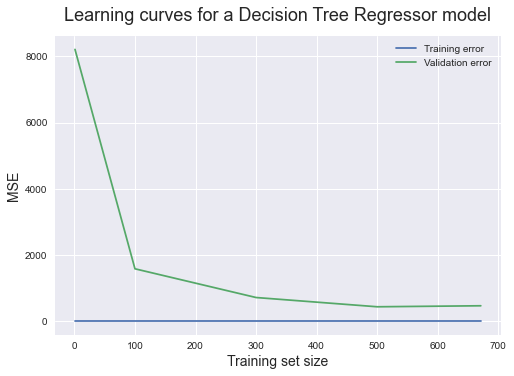

In [262]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Decision Tree Regressor model', fontsize = 18, y = 1.03)
plt.legend()

Ridge

In [263]:
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(x_train, y_train)
    scores = cross_val_score(ridgeModel, x, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

0.25 : 84.77265608697581
0.5 : 84.95867639283404
0.75 : 85.11219333378257
1.0 : 85.24166454823914
1.25 : 85.35297925897459
1.5 : 85.45026900400279
1.75 : 85.53649115320914
2.0 : 85.6138100213992


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [264]:
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(x_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(x_test, y_test))

0.8895385797941454


In [265]:
cross_val_scores_lasso = []

# List to maintain the different values of Lambda
Lambda = []

# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(x_train, y_train)
    scores = cross_val_score(lassoModel, x, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

0.25 : 86.34141899627133
0.5 : 87.06118700023475
0.75 : 87.11663680074552
1.0 : 87.16282282642517
1.25 : 87.25975707619385
1.5 : 87.33242190774232
1.75 : 87.34940328108523
2.0 : 87.36126689541214


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [266]:
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(x_train, y_train)

# Evaluating the Lasso Regression model
print(lassoModelChosen.score(x_test, y_test))

0.8857224376666377


In [278]:

print("lassoModel:"+str(lassoModelChosen.score(x_test, y_test)))
print("ridgeModel: "+str(ridgeModelChosen.score(x_test, y_test)))
print('DecisionTreeRegressor: '+str(tree))
print('GridSearch: '+str(Grid))
print('Linear: '+str(linear))

lassoModel:0.8857224376666377
ridgeModel: 0.8895385797941454
DecisionTreeRegressor: 0.9355132069222118
GridSearch: 0.9338051696491996
Linear: 0.8878655341402064


In [292]:
train_sizes = [1, 100, 300, 500, 671]
train_sizes, train_scores, validation_scores = \
    learning_curve(estimator=lassoModelChosen, X=x, y=y,
                                                             train_sizes=train_sizes, cv=5,
                                                             scoring='neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)  # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [293]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100    112.578547
300    409.535590
500    428.962787
671    404.240217
dtype: float64

 --------------------

Mean validation scores

 1      8210.395623
100    1239.248937
300     602.387271
500     576.184398
671     578.603443
dtype: float64


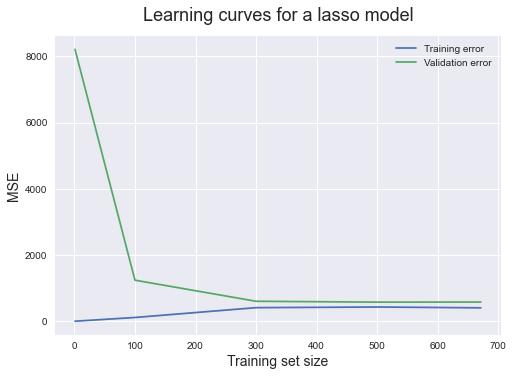

In [294]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a lasso model', fontsize = 18, y = 1.03)
plt.legend()

In [288]:
train_sizes = [1, 100, 300, 500, 671]
train_sizes, train_scores, validation_scores = \
    learning_curve(estimator=ridgeModelChosen, X=x, y=y,
                                                             train_sizes=train_sizes, cv=5,
                                                             scoring='neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)  # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[  -0.           -0.           -0.           -0.           -0.        ]
 [-411.78466114  -37.77701851  -37.77701851  -37.77701851  -37.77701851]
 [-545.06048656 -389.23267572 -371.1282634  -371.1282634  -371.1282634 ]
 [-488.68458287 -338.55792086 -378.32809582 -469.62166884 -469.62166884]
 [-457.01300345 -327.51853311 -365.66583956 -436.71739576 -434.28631442]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -9006.0297619  -10282.99404762  -8515.24404762  -5884.38690476
   -7363.32335329]
 [  -668.91130654  -2614.33241612  -2003.0207598    -557.22645318
    -352.75375048]
 [  -501.67377051   -910.46920813   -682.56440115   -510.02183472
    -407.20714109]
 [  -364.61406305   -959.13388873   -647.21129902   -484.19922726
    -425.76351072]
 [  -326.78052602   -983.18344466   -650.13504945   -480.23418483
    -452.68400826]]


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [289]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100    112.578547
300    409.535590
500    428.962787
671    404.240217
dtype: float64

 --------------------

Mean validation scores

 1      8210.395623
100    1239.248937
300     602.387271
500     576.184398
671     578.603443
dtype: float64


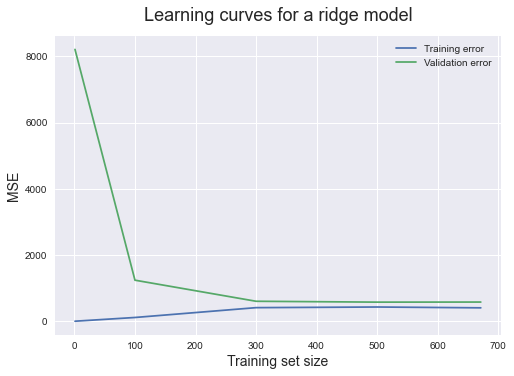

In [291]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a ridge model', fontsize = 18, y = 1.03)
plt.legend()

In [298]:
train_sizes = [1, 100, 300, 500, 671]
train_sizes, train_scores, validation_scores = \
    learning_curve(estimator=GridSearchCV(treeReg,parm_grid,cv=5), X=x, y=y,
                                                             train_sizes=train_sizes, cv=5,
                                                             scoring='neg_mean_squared_error')
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70)  # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

Training scores:

 [[          nan           nan           nan           nan           nan]
 [  -0.           -0.           -0.          -13.34633333  -24.51903088]
 [-252.49749883 -479.83199232   -0.         -137.71799834   -0.        ]
 [-221.15143132   -0.         -147.36810889 -273.61765948 -273.61765948]
 [-187.20194029   -0.         -148.72521007 -311.01322472 -210.95315954]]

 ----------------------------------------------------------------------

Validation scores:

 [[           nan            nan            nan            nan
             nan]
 [-2113.80952381 -3163.75       -2141.5         -626.45022404
   -795.91577026]
 [ -597.39270483  -802.31990446  -813.83928571  -210.53745358
   -270.26347305]
 [ -273.97337501  -758.56547619  -678.26337638  -293.16793935
   -288.24197432]
 [ -303.90913125  -892.51785714  -627.05978684  -171.18427619
   -237.58980651]]


C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hesha\anaconda3\lib

In [299]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1             NaN
100      7.573073
300    174.009498
500    183.150972
671    171.578707
dtype: float64

 --------------------

Mean validation scores

 1              NaN
100    1768.285104
300     538.870564
500     458.442428
671     446.452172
dtype: float64


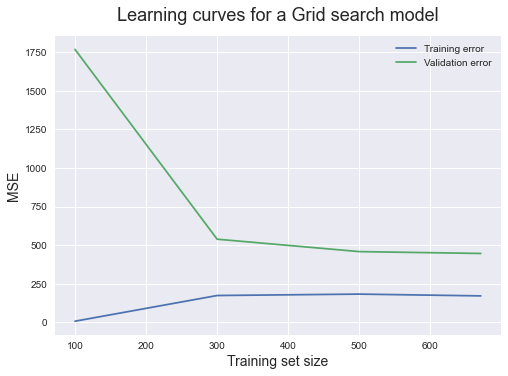

In [301]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Grid search model', fontsize = 18, y = 1.03)
plt.legend()